In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [3]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [4]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [5]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [6]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [7]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [8]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [9]:
column1=['Hotel_name','mean_reviewer_score']

In [10]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [11]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [12]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [13]:
TransitGroups=Connect.transit_count.unique()

In [14]:
TransitGroups.size

17

In [15]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [16]:
bins = [-1, 0, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 0]    562.0
(0, 2]     526.0
(2, 4]     258.0
(4, 6]      75.0
(6, 8]      38.0
(8, 20]     18.0
dtype: float64

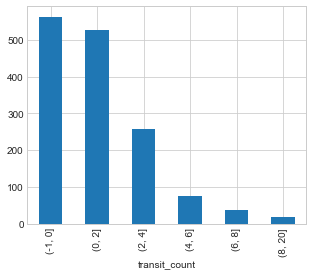

In [17]:
Transits.plot('bar')
plt.show()

In [18]:
Con1 = Connect[Connect.transit_count==0].mean_reviewer_score.mean()
Con1

8.492160449427232

In [19]:
Con2 = Connect[(Connect['transit_count']>0) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.451592721307414

In [20]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [21]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [22]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [23]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [24]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [25]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [26]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [27]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

In [28]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [30]:
Vienna=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Vienna']
len(Vienna.Hotel_Name.unique())

158

In [32]:
hotels_zero_transit=pd.DataFrame(Connect[Connect.transit_count==0].Hotel_Name)


In [33]:
Hotel_Vienna = hotels_zero_transit[hotels_zero_transit['Hotel_Name'].isin(Vienna.Hotel_Name.unique())]
Hotel_Vienna

,Hotel_Name
794,Park Hyatt Vienna
800,Schlosshotel R mischer Kaiser
801,Hotel Mailberger Hof
811,Novotel Wien City
846,Vienna Sporthotel
851,Hotel Regina
855,Hotel Boltzmann
859,Hotel ViennArt am Museumsquartier
883,Palais Coburg Residenz
916,Mercure Vienna First


In [34]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Vienna.Hotel_Name.unique())]
len(TEMP)

15616

In [36]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [37]:
len(corpusN)

11024

In [38]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [39]:
from functools import reduce

In [40]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

11024

In [41]:
wordSet=set(bowAnew)
wordSet

{'kiss',
 'steami',
 'signsag',
 'unbelivbl',
 'fillup',
 'item',
 'unsoci',
 'buzz',
 'shoe',
 'unawar',
 'phonic',
 'mad',
 'florisdorf',
 'prestig',
 'inject',
 'serta',
 'cat',
 'pink',
 'inner',
 'tooth',
 'garlic',
 'flavour',
 'pasta',
 'ashcan',
 'divers',
 'telephon',
 'secondari',
 'width',
 'adverts',
 'colleg',
 'exost',
 'bot',
 'primarili',
 'wood',
 'ness',
 'stiffl',
 'alic',
 'ould',
 'far',
 'recepet',
 'purs',
 'cough',
 'storeroom',
 'highest',
 'wth',
 'rubbish',
 'familiar',
 'sport',
 'concert',
 'mistook',
 'hade',
 'hanger',
 'isol',
 'parkplac',
 'paie',
 'coldli',
 'contamin',
 'pr',
 'hotel',
 'drain',
 'sunday',
 'transport',
 'magnitud',
 'pastri',
 'roulant',
 'sinus',
 'elevetor',
 'hint',
 'machin',
 'establish',
 'layer',
 'cleaneast',
 'bread',
 'gentli',
 'steadi',
 'furthermor',
 'yell',
 'sir',
 'disabl',
 'coke',
 'pneumat',
 'collegu',
 'omelet',
 'partner',
 'wound',
 'shortli',
 'bahn',
 'ash',
 'stranger',
 'everythg',
 'alchohol',
 'banner',


In [42]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [43]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'kiss': 0.0, 'steami': 0.0, 'signsag': 0.0, 'unbelivbl': 0.0, 'fillup': 0.0, 'item': 0.0, 'unsoci': 0.0, 'buzz': 0.0, 'shoe': 0.0, 'unawar': 0.0, 'phonic': 0.0, 'mad': 0.0, 'florisdorf': 0.0, 'prestig': 0.0, 'inject': 0.0, 'serta': 0.0, 'cat': 0.0, 'pink': 0.0, 'inner': 0.0, 'tooth': 0.0, 'garlic': 0.0, 'flavour': 0.0, 'pasta': 0.0, 'ashcan': 0.0, 'divers': 0.0, 'telephon': 0.0, 'secondari': 0.0, 'width': 0.0, 'adverts': 0.0, 'colleg': 0.0, 'exost': 0.0, 'bot': 0.0, 'primarili': 0.0, 'wood': 0.0, 'ness': 0.0, 'stiffl': 0.0, 'alic': 0.0, 'ould': 0.0, 'far': 0.0, 'recepet': 0.0, 'purs': 0.0, 'cough': 0.0, 'storeroom': 0.0, 'highest': 0.0, 'wth': 0.0, 'rubbish': 0.0, 'familiar': 0.0, 'sport': 0.0, 'concert': 0.0, 'mistook': 0.0, 'hade': 0.0, 'hanger': 0.0, 'isol': 0.0, 'parkplac': 0.0, 'paie': 0.0, 'coldli': 0.0, 'contamin': 0.0, 'pr': 0.0, 'hotel': 0.0, 'drain': 0.0, 'sunday': 0.0, 'transport': 0.0, 'magnitud': 0.0, 'pastri': 0.0, 'roulant': 0.0, 'sinus': 0.0, 'elevetor': 0.0, '

In [44]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
room,0.871169
hotel,0.577115
breakfast,0.496827
noth,0.435765
staff,0.408286
small,0.384292
bed,0.375553
bit,0.370764
one,0.370209
could,0.369467
